In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
df = pd.read_csv('data.csv')
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [35]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['minute'] = df['date'].apply(lambda x: x.minute)

df = df.drop('date', axis=1)
    
# Split df into X and y
y = df['number_people']
X = df.drop(['number_people','timestamp','day_of_week','is_start_of_semester','is_during_semester'], axis=1)
    
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    

In [36]:
X_train

,is_weekend,is_holiday,temperature,month,hour,day,minute
23552,-0.623864,-0.049641,-0.565892,-1.000469,-0.926864,-0.436112,-1.668369
3026,-0.623864,-0.049641,1.069425,0.452734,-0.331144,-0.209158,1.227967
16668,-0.623864,-0.049641,-1.043125,-1.581751,0.860295,-1.684358,-0.509835
13838,1.602914,-0.049641,-0.833143,-1.872391,0.711366,-1.457404,1.227967
6459,-0.623864,-0.049641,1.109194,0.743375,1.307085,0.358226,1.227967
...,...,...,...,...,...,...,...
50057,1.602914,-0.049641,0.547651,0.743375,-1.373653,1.492995,0.996260
32511,-0.623864,-0.049641,0.429933,-0.419188,1.307085,0.925610,0.069433
5192,-0.623864,-0.049641,0.631962,0.743375,1.604945,-1.116974,-0.509835
12172,-0.623864,-0.049641,-1.035171,1.324656,1.307085,0.131272,-0.509835


In [37]:
models={
    "Linear Regression (Ridge)":Ridge(),
    "       Random Forest     ":RandomForestRegressor()
}

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+" Trained")

Linear Regression (Ridge) Trained
       Random Forest      Trained


In [62]:
def get_rmse(y_test, y_pred):
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    return rmse
def get_r2(y_test,y_pred):
    r2=1-(np.sum((y_test-y_pred)**20)/np.sum((y_test-y_test.mean())**2))
    return r2

In [63]:
for name ,model in models.items():
    y_pred=model.predict(X_test)
    rmse=get_rmse(y_test,y_pred)
    print(name+"RMSE:{:.2f}".format(rmse))

Linear Regression (Ridge)RMSE:17.32
       Random Forest     RMSE:7.09


In [64]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = get_r2(y_test, y_pred)
    print(name + " R^2: {:.5f}".format(r2))

Linear Regression (Ridge) R^2: -621948845214142966292377663176704.00000
       Random Forest      R^2: -2231259534067683646682328727552.00000


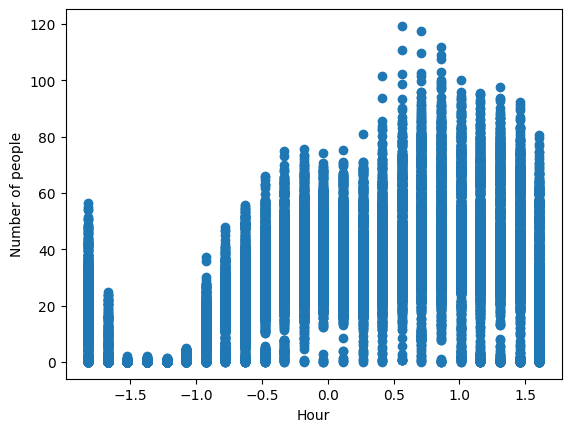

In [71]:
# hour와 number_people 컬럼 추출
df_hour = df[['hour', 'number_people']]

# 시간대별 평균 number_people 계산
df_hour_mean = df_hour.groupby('hour').mean()

# 그래프 그리기
#df_hour_mean.plot(kind='line', y='number_people', xticks=df_hour_mean.index)
pred_hour = X_test['hour'].values
pred = models["       Random Forest     "].predict(X_test)
plt.scatter(pred_hour, pred)
#plt.scatter(pred_hour, y_test)

plt.xlabel('Hour')
plt.ylabel('Number of people')
plt.show()

In [ ]:
#여기에서 랜덤포레스트 모델 뽑아낼 예정